### Week 1

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(units = 1, input_shape = [1])]
)

model.compile(optimizer = "sgd", loss =keras.losses.MeanSquaredError())

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs = 500)

print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 233ms/step - loss: 4.2449
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 3.5078
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 2.9244
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 2.4620
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 2.0949
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 1.8029
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 1.5699
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 1.3836
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 1.2339
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 1.1131
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 1.0152
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 0.9353
Epoch 13/500
1/1 [==============================] - 0

#### Week 2(without using CNN) for computer vision problem

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

fmnist = keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


LABEL: 3

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194 102   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  73 186 177 183 175 188 232 255 223 219 194 179 186 213 146   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 163 140 150 152 150 146 175 175 173 171 156 152 148 129 156 140   0   0   0   0   0   0]
 [  0   0   0   0   0 150 142 140 152 160 156 146 142 127 135 133 140 140 137 133 125 169  75   0   0   0   0   0]
 [  0   0   0   0   0  54 167 146 129 142 137 137 131 148 148 133 131 131 131 125 140 140   0   0   0   0   0   0]
 [  0   0   0   0   0   0 110 188 133 146 152 133 125 127 119 129 133 119 140 131 150  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 221 158 137 135 123 110 110 114 108 112 117 127 142  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  25 158 137 125 119 119 110 117 117 110 119 127 144   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 123 156 129 112 

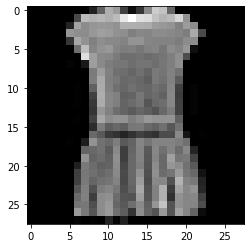

In [ ]:
import matplotlib.pyplot as plt


# You can put between 0 to 59999 here
idx = 3

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[idx]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[idx]}')

# Visualize the image
plt.imshow(training_images[idx], cmap ="gray")

In [ ]:
training_images = training_images / 255.
test_images = test_images / 255.

In [ ]:
# Build the classification model
model = keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
#just to test softmax, no real reason though
inputs = np.array([[1, 3, 4, 2]], dtype = float)
inputs = tf.convert_to_tensor(inputs)

outputs = keras.activations.softmax(inputs)
print(f"outputs of softmax function: {outputs.numpy()}")

# gets sum of softmax(meant to be 1)
sum = tf.reduce_sum(outputs, axis = -1)
print(f"sum of outputs: {sum}")

# get idx of prediction with highest value
prediction = np.argmax(outputs)
print("class with highest prob is : ", prediction)

outputs of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: [1.]
class with highest prob is :  2


In [ ]:
# my custom callback class for max control of callbacks
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs = {}):

    '''
    Halts the training after reaching 60 percent accuracy, on end of an epoch

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    if(logs["accuracy"] >= 0.91):  # if this accuracy is what we want, we could also use loss rather than acc
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallback()

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
# model.fit(training_images, training_labels, epochs=5, callbacks = [callback])


Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2447 - accuracy: 0.9089
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2288 - accuracy: 0.9138
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2214 - accuracy: 0.9166
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2107 - accuracy: 0.9209
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2052 - accuracy: 0.9227


In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3336 - accuracy: 0.8876


[0.33356010913848877, 0.8876000046730042]

In [ ]:
predictions = model.predict(test_images)

print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


### Week 3 CNN

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images / 255.
test_images = test_images / 255.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(64, 3, activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation ="relu"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32, 3, activation ="relu"),
    tf.keras.layers.MaxPooling2D(2),

    # FC
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, tf.nn.relu),
    tf.keras.layers.Dense(10, activation = "softmax")

])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs = 15, callbacks = [callback])
model.fit(train_images, train_labels, epochs = 15)


print("\nModel Evaluation")
model.evaluate(test_images, test_labels)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6007 - accuracy: 0.7806
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4057 - accuracy: 0.8514
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3476 - accuracy: 0.8717
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3148 - accuracy: 0.8842
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2890 - accuracy: 0.8933
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2684 - accuracy: 0.9007
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2500 - accuracy: 0.9059
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2363 - accuracy: 0.9124
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2239 - accuracy: 0.9162
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.214

[0.3384222984313965, 0.8913999795913696]

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


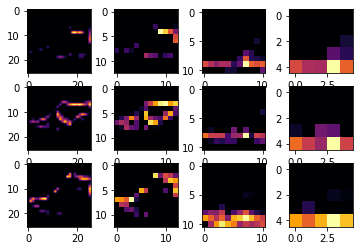

In [ ]:
# viz progress of image passing through the layers

import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)


FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER =10  # convolution number refers to filter since min is 32, best to set number not to exceed this

layer_outputs = [layer.output for layer in model.layers]
# print(layer_outputs[0])
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

**Exploring convolutions and pooling using manual conv and pooling**

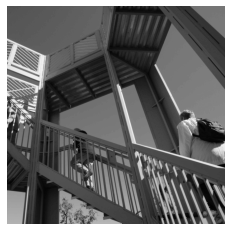

In [ ]:
from scipy import misc
import matplotlib.pyplot as plt



# load the ascent image from Scipy(could be any grayscale image)
ascent_image = misc.ascent()
plt.grid(False)
plt.gray()
plt.axis("off")
plt.imshow(ascent_image)

In [ ]:
import numpy as np

# copy image as np array
image_transformed = np.copy(ascent_image)

size_x = image_transformed.shape[1]
size_y = image_transformed.shape[0]

(512, 512)

In [ ]:
# Experiment with different values and see the effect
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [ ]:
# Iterate over the image
for  x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[y-1, x-1] * filter[0][0])
      convolution = convolution + (ascent_image[y-1, x] * filter[0][1])  
      convolution = convolution + (ascent_image[y-1, x+1] * filter[0][2])     
      convolution = convolution + (ascent_image[y, x-1] * filter[1][0])    
      convolution = convolution + (ascent_image[y, x] * filter[1][1])    
      convolution = convolution + (ascent_image[y, x+1] * filter[1][2])    
      convolution = convolution + (ascent_image[y+1, x-1] * filter[2][0])    
      convolution = convolution + (ascent_image[y+1, x] * filter[2][1])    
      convolution = convolution + (ascent_image[y+1, x+1] * filter[2][2])    
      
      # Multiply by weight
      convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[y, x] = convolution

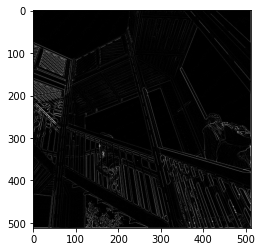

In [ ]:
# plot result of convolution
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()   

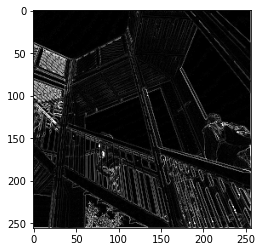

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[y, x])
    pixels.append(image_transformed[y+1, x])
    pixels.append(image_transformed[y, x+1])
    pixels.append(image_transformed[y+1, x+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(y/2),int(x/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()   

### **Week 4(Train a Horse to Human clf)**

In [1]:
# gets the train dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# gets validation dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-09-11 15:06:14--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   306MB/s    in 0.5s    

2022-09-11 15:06:15 (306 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2022-09-11 15:06:15--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M

In [17]:
import zipfile

# Unzip train dataset
local_zip = "./horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./horse-or-human")


# Unzip validation dataset
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [18]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [19]:
# view file names of somefiles
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_hames = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_hames[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')


# get number of train samples for horse and human
print('\ntotal training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

# gets number validation samples for horse and human
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

TRAIN SET HORSES: ['horse31-4.png', 'horse37-2.png', 'horse45-0.png', 'horse34-7.png', 'horse38-0.png', 'horse09-6.png', 'horse12-4.png', 'horse07-9.png', 'horse33-8.png', 'horse04-6.png']
TRAIN SET HUMANS: ['human15-00.png', 'human13-01.png', 'human01-28.png', 'human05-08.png', 'human11-17.png', 'human03-08.png', 'human03-20.png', 'human07-25.png', 'human07-30.png', 'human14-08.png']
VAL SET HORSES: ['horse4-495.png', 'horse2-201.png', 'horse6-275.png', 'horse6-153.png', 'horse4-548.png', 'horse5-400.png', 'horse5-203.png', 'horse3-416.png', 'horse1-384.png', 'horse3-141.png']
VAL SET HUMANS: ['valhuman05-23.png', 'valhuman04-17.png', 'valhuman03-05.png', 'valhuman01-04.png', 'valhuman04-15.png', 'valhuman03-17.png', 'valhuman05-13.png', 'valhuman01-18.png', 'valhuman05-06.png', 'valhuman05-26.png']

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


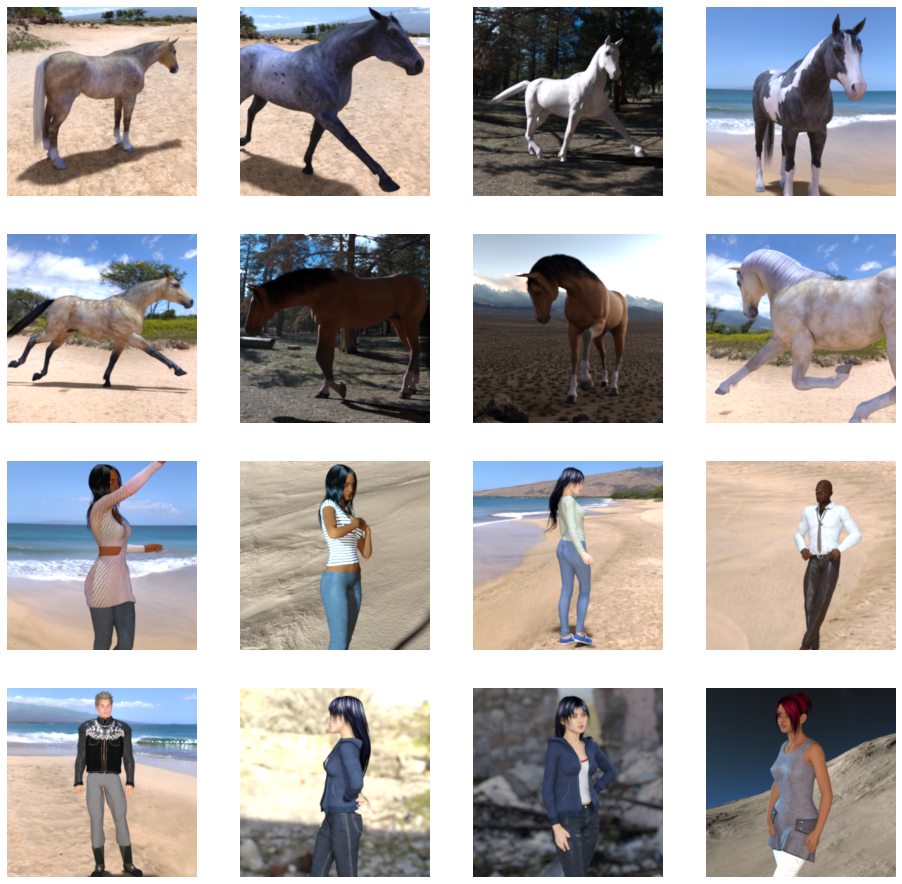

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # used to read image

nrows = 4
ncols = 4

# index for iterating over Images
pic_index = 0


# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()  # gets current plt figure
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Model Building**

In [21]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 35, 64)      

In [22]:
model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.RMSprop(0.001),
              metrics = ["accuracy"])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images(no val dataset is used here)
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since you used binary_crossentropy loss, you need binary labels
        class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch = 8, # from samples/batch_size
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8 # from samples/batch_size
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 12s 1s/step - loss: 0.8451 - accuracy: 0.5083 - val_loss: 0.6790 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 909ms/step - loss: 0.6448 - accuracy: 0.5884 - val_loss: 0.6364 - val_accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 7s 1s/step - loss: 0.5746 - accuracy: 0.7542 - val_loss: 0.7891 - val_accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 7s 900ms/step - loss: 0.3055 - accuracy: 0.8932 - val_loss: 0.8542 - val_accuracy: 0.8477
Epoch 5/15
8/8 [==============================] - 7s 891ms/step - loss: 0.2158 - accuracy: 0.9210 - val_loss: 1.2450 - val_accuracy: 0.8320
Epoch 6/15
8/8 [==============================] - 7s 900ms/step - loss: 0.1004 - accuracy: 0.9622 - val_loss: 1.8415 - val_accuracy: 0.8203
Epoch 7/15
8/8 [==============================] - 8s 999ms/step - loss: 0.4336 - a

In [30]:
# allow you to choose 1 or more files from your file system, upload them, and run them through the model,
# giving an indication of whether the object is a horse or a human.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # iter through each file uploaded

  path = "/content/" + fn
  img = image.load_img(path, target_size = (300, 300))
  x = image.img_to_array(img)
  x /= 255
  # x = x[np.newaxis, ...]
  x = np.expand_dims(x, axis = 0)


  # stack the images to be in like a array of img, where each row is an img
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if(classes[0] > 0.5):
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving pexels-julian-jagtenberg-103123.jpg to pexels-julian-jagtenberg-103123.jpg
[1.]
pexels-julian-jagtenberg-103123.jpg is a human


./horse-or-human/humans/human11-30.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


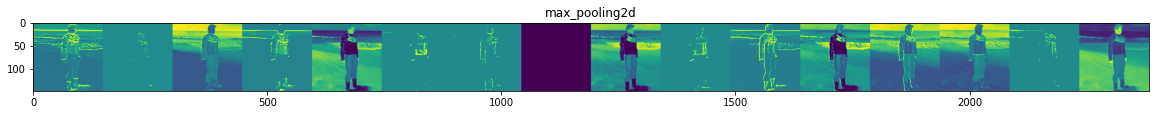

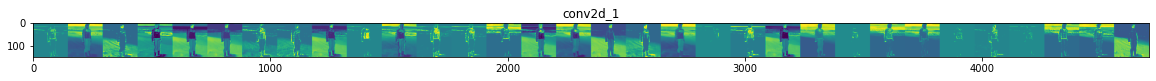

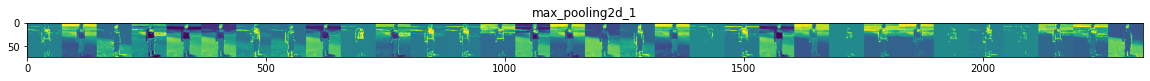

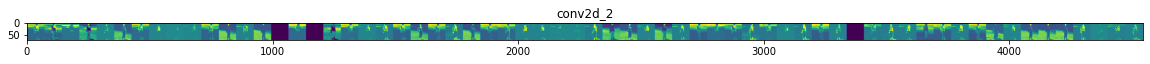

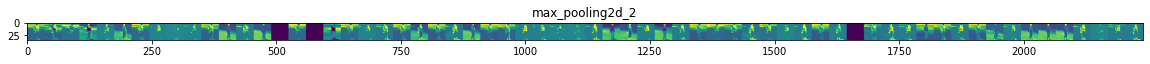

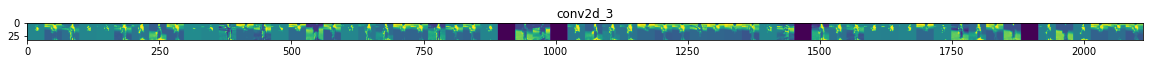

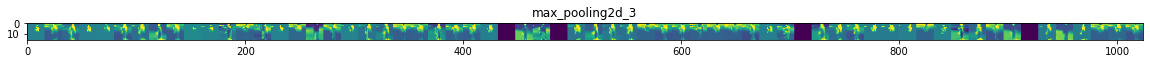

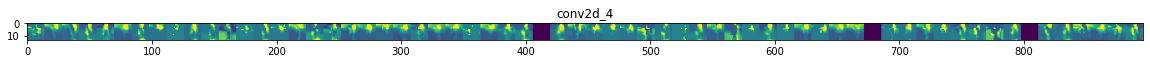

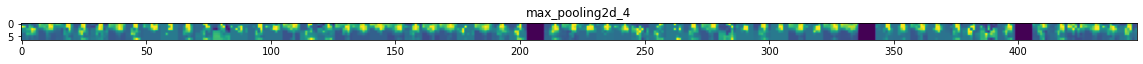

In [24]:
# viz how input gets transformed as it goes down the model


import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

print(img_path)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i] # get a praticular feature
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')